In [5]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
import sidetable as stb
from pathlib import Path

In [6]:
# load Ames_HousePrice.csv data
housing_data = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing_data

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


## Inspect features

initial sum of all missing values: 12254


Text(0.5, 1.0, 'Missing Value Count by Feature')

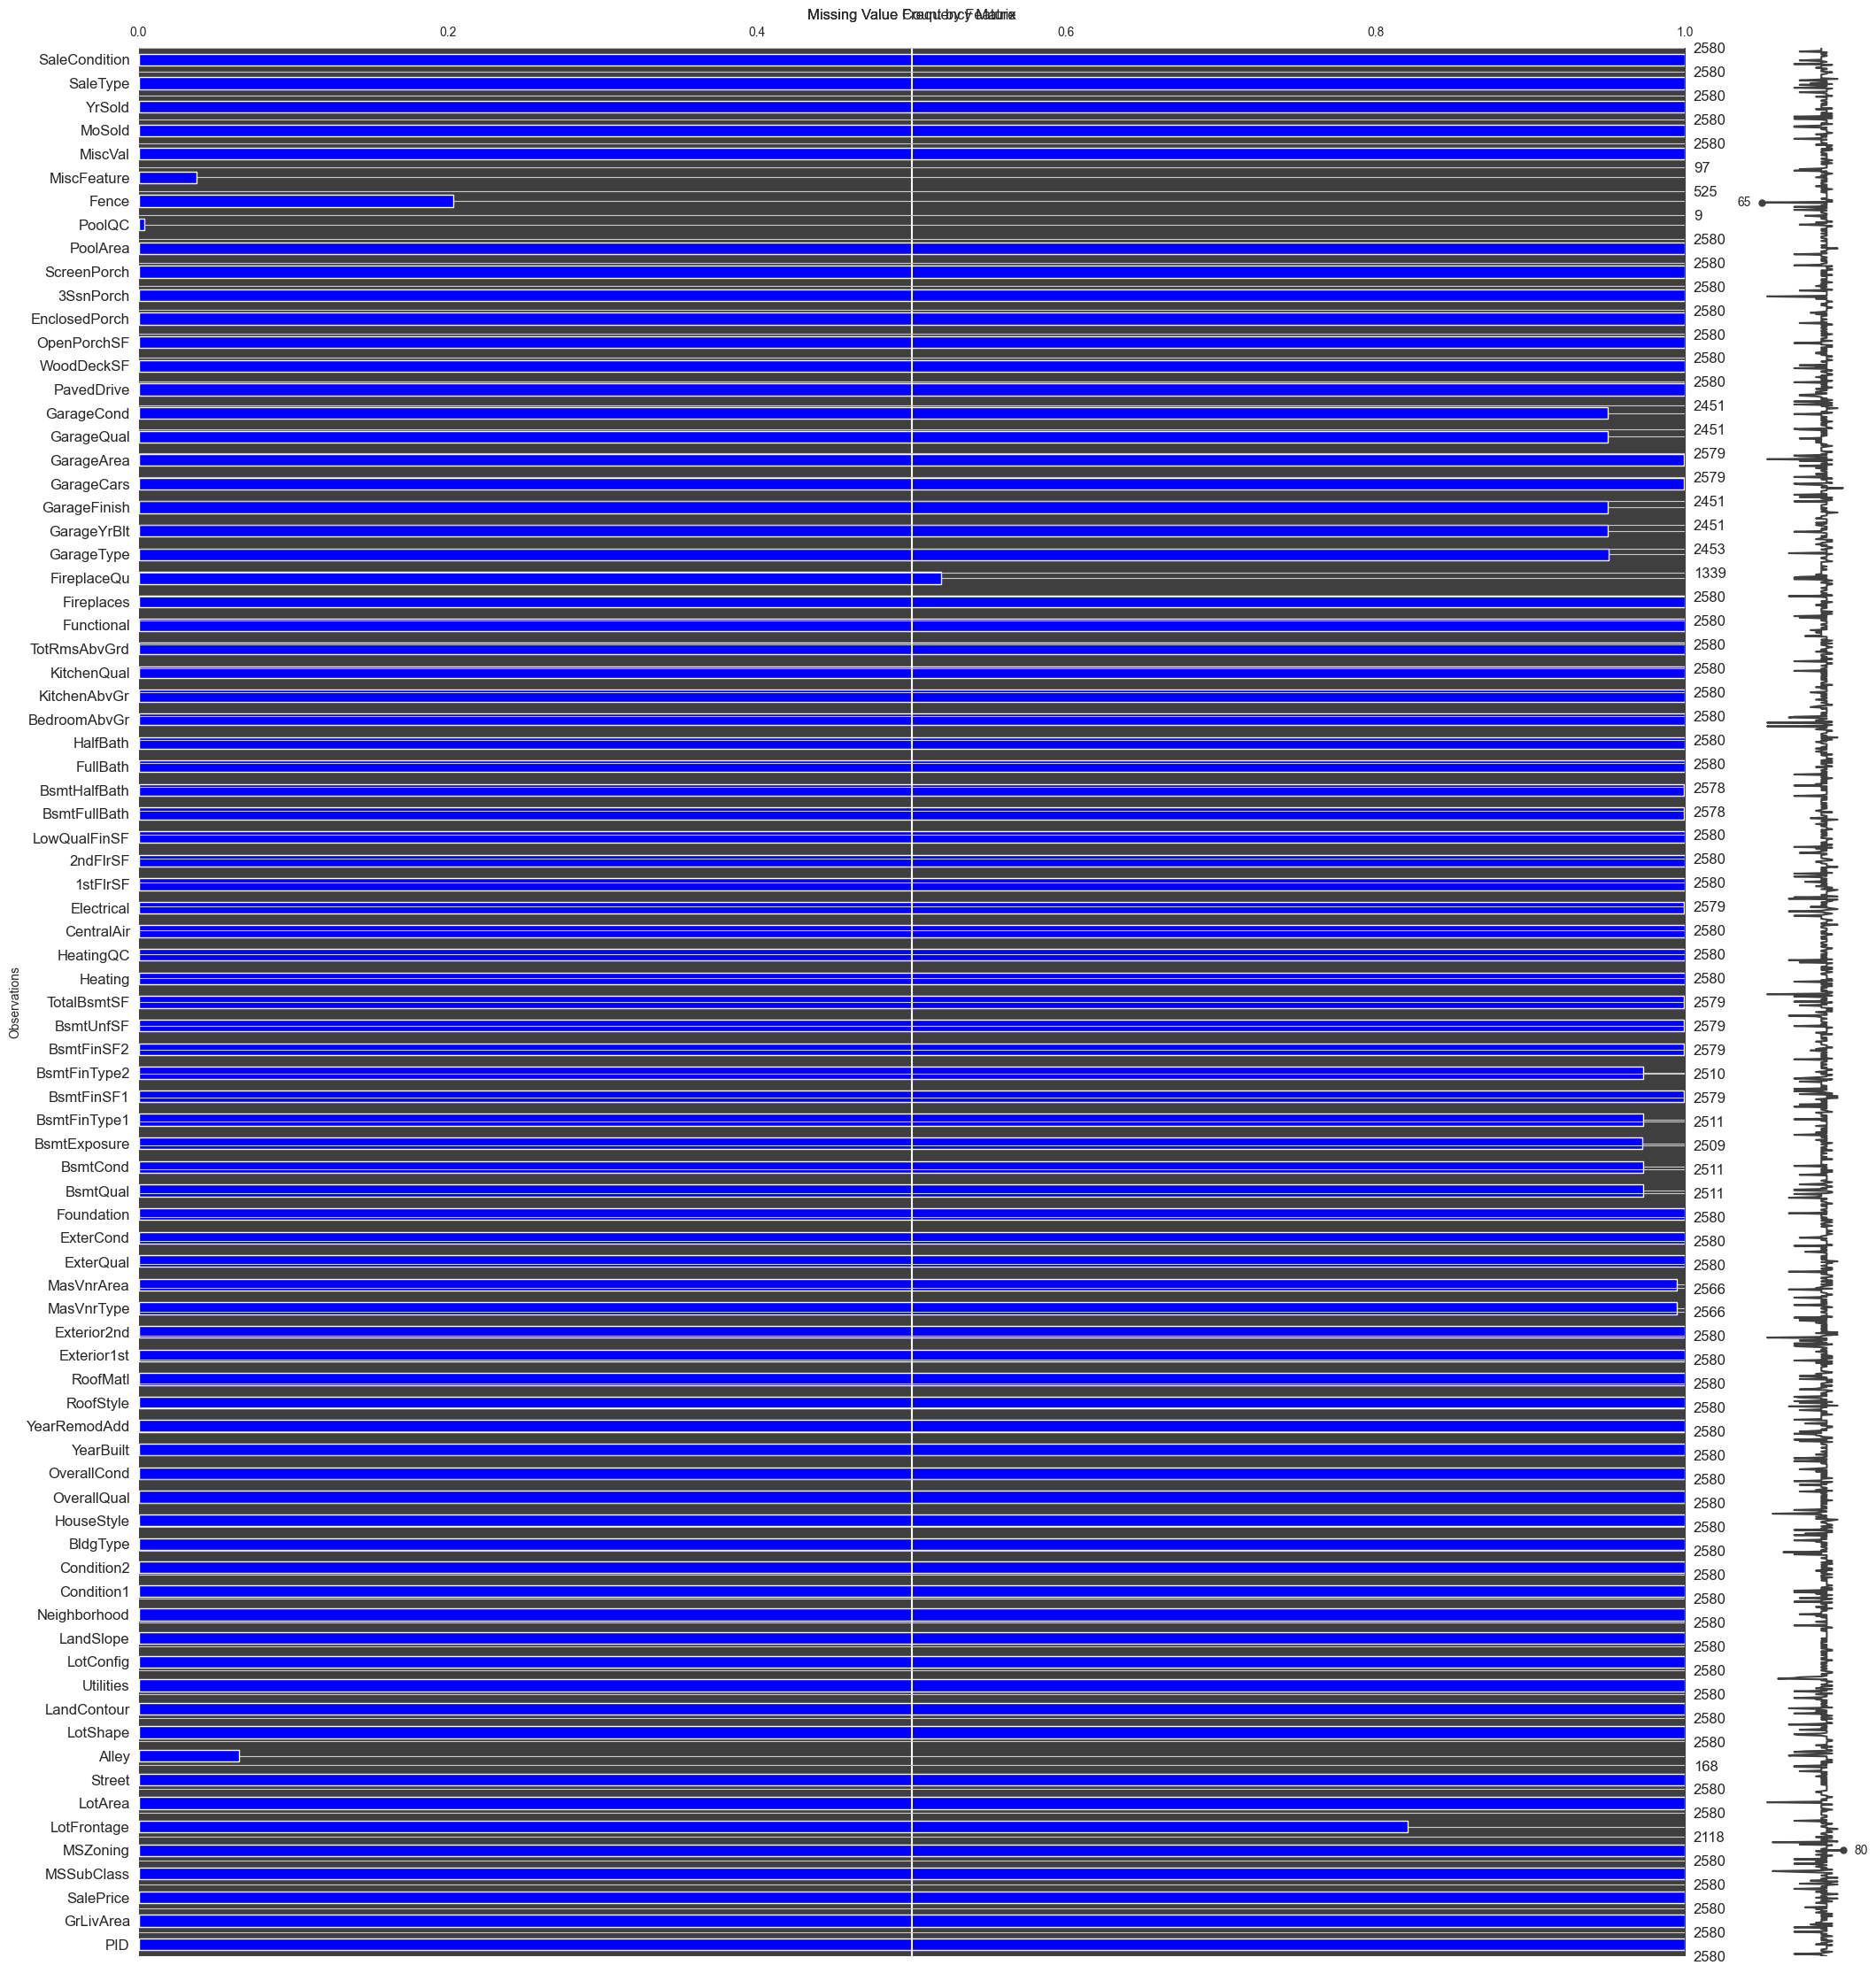

In [7]:
# save feature names to list
header_lst = housing_data.columns

# initial sum of all missing values
missing_sum_init = sum(housing_data.isnull().sum())
print('initial sum of all missing values: ' + str(missing_sum_init))

# missing value frequency matrix by feature
msno.matrix(housing_data, figsize=(10,8), fontsize=12)
plt.title('Missing Value Frequency Matrix')
plt.xlabel('Features')
plt.ylabel('Observations')

# missing value count bar graph by feature
msno.bar(housing_data, fontsize=12, color="blue")
plt.title('Missing Value Count by Feature')

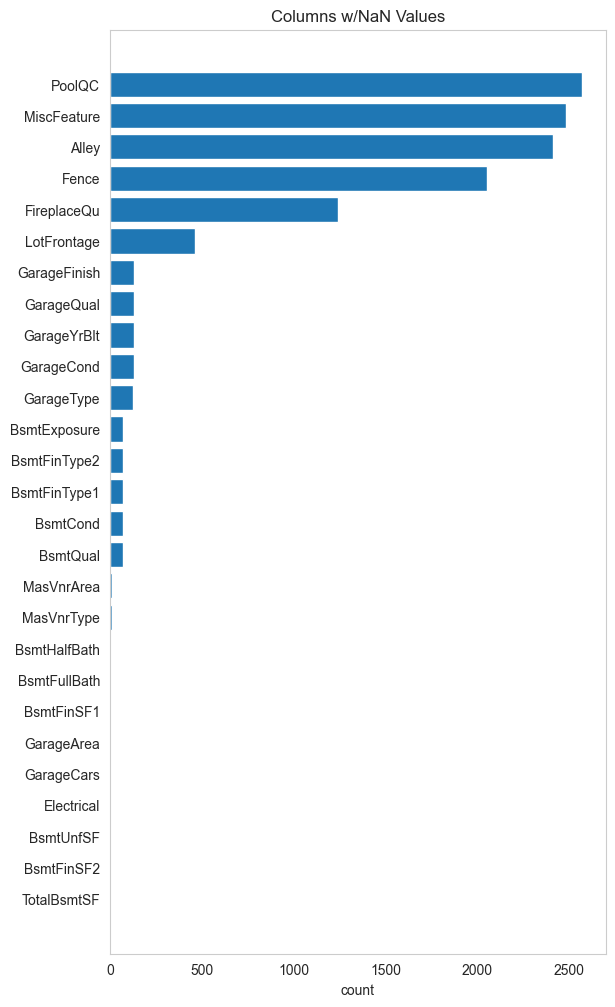

In [8]:
# count missing values by column
missing_values = housing_data.stb.missing()
missing_values = missing_values[missing_values.missing != 0]

labels = missing_values.sort_values(by=['missing']).index.values.tolist() 
values = missing_values.sort_values(by=['missing'])['missing']

plt.figure().set_figheight(12)
plt.barh(labels, values)
plt.grid(False)

# setting label of x-axis
plt.xlabel("count")
plt.title("Columns w/NaN Values")
plt.show()

## Replace missing values (refer to data dictionary for details)

In [9]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].mean())
housing_data['Alley'] = housing_data['Alley'].fillna('N_A')
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('N_A')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('N_A')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('N_A')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('N_A')
housing_data['BsmtFinSF1'] = housing_data['BsmtFinSF1'].fillna(0)
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('N_A')
housing_data['BsmtFinSF2'] = housing_data['BsmtFinSF2'].fillna(0)
housing_data['BsmtUnfSF'] = housing_data['BsmtUnfSF'].fillna(0)
housing_data['TotalBsmtSF'] = housing_data['TotalBsmtSF'].fillna(0)
housing_data['Electrical'] = housing_data['Electrical'].fillna('Mix')
housing_data['BsmtFullBath'] = housing_data['BsmtFullBath'].fillna(0)
housing_data['BsmtHalfBath'] = housing_data['BsmtHalfBath'].fillna(0)
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('N_A')
housing_data['GarageType'] = housing_data['GarageType'].fillna('N_A')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('N_A')
housing_data['GarageCars'] = housing_data['GarageCars'].fillna(0)
housing_data['GarageArea'] = housing_data['GarageArea'].fillna(0)
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('N_A')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('N_A')
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('N_A')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('N_A')
housing_data['Fence'] = housing_data['Fence'].fillna('N_A')
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('N_A')

# drop 'PID' identification column
housing_data = housing_data.drop('PID', axis=1)

# validate missing values are replaced
missing_sum_post = sum(housing_data.isnull().sum())
print('post-process sum of all missing values: ' + str(missing_sum_post))

post-process sum of all missing values: 0


## Enocde categorical ordinal features

In [10]:
# define scale mapper dictionary for categorical ordinal features
scale_mapper_ExterQual = ['ExterQual', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_ExterCond = ['ExterCond', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_BsmtQual = ['BsmtQual', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_ExterCond = ['ExterCond', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_BsmtQual = ['BsmtQual', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_BsmtCond = ['BsmtCond', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_BsmtExposure = ['BsmtExposure', {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'N_A':0}]
scale_mapper_BsmtFinType1 = ['BsmtFinType1', {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'N_A':0}]
scale_mapper_BsmtFinType2 = ['BsmtFinType2', {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'N_A':0}]
scale_mapper_HeatingQC = ['HeatingQC', {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}]
scale_mapper_KitchenQual = ['KitchenQual', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_Functional = ['Functional', {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}]
scale_mapper_FireplaceQu = ['FireplaceQu', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_GarageQual = ['GarageQual', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_GarageCond = ['GarageCond', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_PoolQC = ['PoolQC', {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'N_A':0}]
scale_mapper_GarageCond = ['GarageCond', {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'N_A':0}]
scale_mapper_Fence = ['Fence', {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'N_A':0}]

# consolidate scale mappers to list and for loop onto column
scale_mapper_lst = [
    scale_mapper_ExterQual,
    scale_mapper_ExterCond,
    scale_mapper_BsmtQual,
    scale_mapper_ExterCond,
    scale_mapper_BsmtQual,
    scale_mapper_BsmtCond,
    scale_mapper_BsmtExposure,
    scale_mapper_BsmtFinType1,
    scale_mapper_BsmtFinType2,
    scale_mapper_HeatingQC,
    scale_mapper_KitchenQual,
    scale_mapper_Functional,
    scale_mapper_FireplaceQu,
    scale_mapper_GarageQual,
    scale_mapper_GarageCond,
    scale_mapper_PoolQC,
    scale_mapper_GarageCond,
    scale_mapper_Fence
]

for header, scale_mapper in scale_mapper_lst:
    housing_data[header] = housing_data[header].replace(scale_mapper)

## Define features  and target dataframes

In [11]:
housing_df = housing_data
housing_X_features = housing_data.drop('SalePrice', axis=1)
housing_y_target = housing_data['SalePrice']

## Save to data_frames folder

In [12]:
# for housing_df
filepath = Path('./data_frames/housing_df.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
housing_df.to_csv(filepath)

# for housing_X_features
filepath = Path('./data_frames/housing_X_features.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
housing_X_features.to_csv(filepath)

# for housing_y_features
filepath = Path('./data_frames/housing_y_target.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
housing_y_target.to_csv(filepath)

In [13]:
# inspect
housing_df
#housing_X_features
#housing_y_target

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,126000,30,RL,68.516053,7890,Pave,N_A,Reg,Lvl,...,166,0,0,0,N_A,0,3,2010,WD,Normal
2,1049,139500,120,RL,42.000000,4235,Pave,N_A,Reg,Lvl,...,0,0,0,0,N_A,0,2,2009,WD,Normal
3,1001,124900,30,C (all),60.000000,6060,Pave,N_A,Reg,Lvl,...,0,0,0,0,N_A,0,11,2007,WD,Normal
4,1039,114000,70,RL,80.000000,8146,Pave,N_A,Reg,Lvl,...,111,0,0,0,N_A,0,5,2009,WD,Normal
5,1665,227000,60,RL,70.000000,8400,Pave,N_A,Reg,Lvl,...,0,0,0,0,N_A,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,30,RL,68.516053,8854,Pave,N_A,Reg,Lvl,...,40,0,0,0,N_A,0,5,2009,WD,Normal
760,1733,139600,20,RL,68.516053,13680,Pave,N_A,IR1,Lvl,...,0,0,0,0,N_A,0,6,2009,WD,Normal
761,2002,145000,90,RH,82.000000,6270,Pave,N_A,Reg,HLS,...,0,0,0,0,N_A,0,8,2007,WD,Normal
762,1842,217500,60,RL,68.516053,8826,Pave,N_A,Reg,Lvl,...,0,0,0,0,N_A,0,7,2007,WD,Normal
